In [4]:
import numpy as np
import matplotlib.pyplot as plt

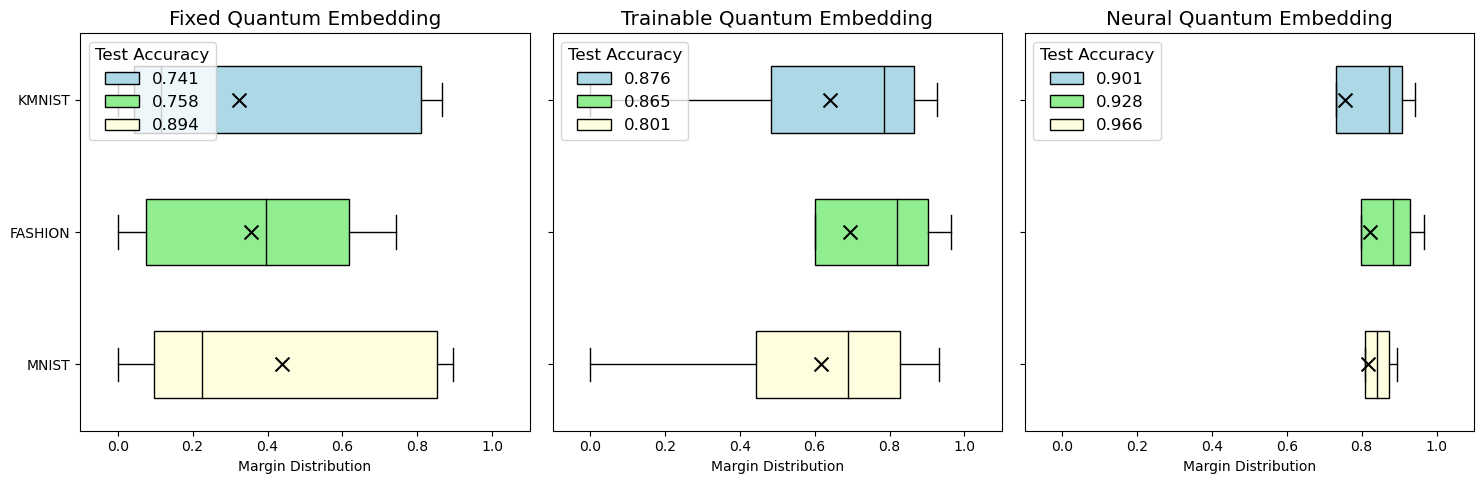

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def get_margin_mean(path):
    return np.load(path + "margin_mean.npy")

def get_test_accuracy(path):
    with open(path + "results.txt", 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "Test Accuracy" in line:
                return float(line.split(":")[1].strip())
    return None

def get_average_margin_boxplot(experiments):
    classifier_list = ["IQPVariationalClassifier", "TQE1Classifier", "NQEClassifier"]
    title_list = ["Fixed Quantum Embedding", "Trainable Quantum Embedding", "Neural Quantum Embedding"]
    data_sets = ["mnist", "fashion", "kmnist"]

    # Initialize dictionaries to accumulate margin boxplot data and mean margin values
    margin_data = {clf: {ds: [] for ds in data_sets} for clf in classifier_list}
    margin_means = {clf: {ds: [] for ds in data_sets} for clf in classifier_list}

    # Loop over each classifier and dataset to gather margin data from all experiments
    for classifier in classifier_list:
        for data in data_sets:
            for exp in experiments:
                path = f"../results/{classifier}/{data}/{exp}exp/"
                margin_data[classifier][data].append(np.load(path + "margin_boxplot.npy"))
                margin_means[classifier][data].append(get_margin_mean(path))

    # Calculate the average margin boxplot and mean of margin means for each classifier and dataset
    avg_margin_boxplot = {clf: {ds: np.mean(margin_data[clf][ds], axis=0) for ds in data_sets} for clf in classifier_list}
    mean_of_margin_means = {clf: {ds: np.mean(margin_means[clf][ds]) for ds in data_sets} for clf in classifier_list}

    # Plotting
    fig, axes = plt.subplots(1, len(classifier_list), figsize=(15, 5))
    plt.rcParams.update({'font.size': 12})
    position = np.array([0, 1, 2])

    # Custom properties for the median line in the boxplot
    medianprops = dict(color='black', linewidth=1)

    for i, classifier in enumerate(classifier_list):
        bp1 = axes[i].boxplot(avg_margin_boxplot[classifier]['mnist'], positions=[0], widths=0.5, patch_artist=True, 
                              boxprops=dict(facecolor="lightyellow"), vert=False, showfliers=False, medianprops=medianprops)
        bp2 = axes[i].boxplot(avg_margin_boxplot[classifier]['fashion'], positions=[1], widths=0.5, patch_artist=True, 
                              boxprops=dict(facecolor="lightgreen"), vert=False, showfliers=False, medianprops=medianprops)
        bp3 = axes[i].boxplot(avg_margin_boxplot[classifier]['kmnist'], positions=[2], widths=0.5, patch_artist=True, 
                              boxprops=dict(facecolor="lightblue"), vert=False, showfliers=False, medianprops=medianprops)
        
        # Plot the mean of margin means as a single marker on the x-axis with larger size
        axes[i].scatter(mean_of_margin_means[classifier]['mnist'], 0, color="black", marker="x", s=100, zorder=3, label=f'MNIST Mean: {mean_of_margin_means[classifier]["mnist"]:.3f}')
        axes[i].scatter(mean_of_margin_means[classifier]['fashion'], 1, color="black", marker="x", s=100, zorder=3, label=f'Fashion Mean: {mean_of_margin_means[classifier]["fashion"]:.3f}')
        axes[i].scatter(mean_of_margin_means[classifier]['kmnist'], 2, color="black", marker="x", s=100, zorder=3, label=f'KMNIST Mean: {mean_of_margin_means[classifier]["kmnist"]:.3f}')
        
        axes[i].set_xlabel("Margin Distribution")
        axes[i].set_xlim(-0.1, 1.1)
        axes[i].set_yticks([0, 1, 2], ["MNIST", "FASHION", "KMNIST"])
        axes[i].set_title(f"{title_list[i]}")
        
        if i != 0:
            axes[i].set_yticklabels([])  # Remove y-axis labels for all but the first plot

        # Read test accuracies for the last experiment (as an example)
        mnist_test_acc = get_test_accuracy(f"../results/{classifier}/mnist/{experiments[-1]}exp/")
        fashion_test_acc = get_test_accuracy(f"../results/{classifier}/fashion/{experiments[-1]}exp/")
        kmnist_test_acc = get_test_accuracy(f"../results/{classifier}/kmnist/{experiments[-1]}exp/")

        axes[i].legend([bp3["boxes"][0], bp2["boxes"][0], bp1["boxes"][0]], 
                       [f'{kmnist_test_acc:.3f}', f'{fashion_test_acc:.3f}', f'{mnist_test_acc:.3f}'], 
                       loc='upper left', title="Test Accuracy")
    
    plt.tight_layout()
    plt.savefig("margin_boxplot.pdf")
    plt.show()

# Example usage
experiments = [0, 1, 2, 3, 4]  # List of experiment indices
get_average_margin_boxplot(experiments)

